<a href="https://colab.research.google.com/github/afonsosr2/bootcamp_DS_Alura/blob/main/Bootcamp_DS_Mod01_Aula05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootcamp Data Science Aplicada

### **Organização:**
Alura Github: https://github.com/alura-cursos

LinkedIn: https://www.linkedin.com/school/aluracursos/

<br>

### **Resolução das aulas e desafios por:**
Afonso Augusto Rios
<br>
Email: afonsosr2@gmail.com

Github: https://github.com/afonsosr2

LinkedIn: https://www.linkedin.com/in/afonsosr2/

# Módulo 01 - Visualizando dados do SUS

## Aula 05
*   Acompanhamento da Aula 05
*   Resolução dos Desafios



Olá, iniciaremos as práticas, análises e estudos sobre dados relativos à saúde no Brasil através do Bootcamp de Data Science Aplicada da Alura. 

Ao longo das aulas vou aplicar o conteúdo aprendido dentro desse curso e resolver os desafios, aproveitando também para fazer minhas próprias análises e olhando os dados de forma mais crítica. 

Nessa aula, vamos fazer a interpretação dos dados do último mês do nosso DataFrame levando em conta todos os estados do Brasil e tecendo uma comparação dos dados com os do Estado da Bahia.

Vamos começar nosso mergulho? 

### Importando a Base de Dados



Em nossa análise, vamos importar os dados do site da DATASUS disponibilizados no [link](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/).

Para a Aula 05, seguiremos explorando os dados relativos aos Procedimentos Hospitalares do SUS por Unidades da Federação no último mês vigente do nosso DataFrame. Junto a isso, será relizada uma pequena análise (bem hipotética) levando em conta os gastos de todo os estados em relação ao estado da Bahia.

Inicialmente, vamos selecionar os dados dos Procedimentos Hospitalares do SUS levando em conta o valor total dos gastos no ano/mês de atendimento por Unidade Federativa.

In [120]:
#importando a biblioteca do Pandas para a leitura dos dados através de um arquivo .csv
import pandas as pd

dados = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/bootcamp_DS_Alura/main/dados/A111646189_28_143_208.csv", encoding="ISO-8859-1",
                    skiprows = 3, sep=";", skipfooter = 12, thousands = ".",
                    decimal = ",")

# Modificando o modo de leitura dos valores totais dos gastos.
pd.options.display.float_format = "{:.2f}".format

dados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
5,16 Amapá,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,1888216.67,1756846.00,1869746.50,2009211.40,2092229.29,2047927.00,2260210.72,2408659.24,2369223.52,2588154.29,2298458.18,2356798.88,2441325.03,2564176.12,2604263.92,2573615.74,2127851.77,2632890.52,2445874.82,2173060.89,2541342.33,2540183.86,2239443.36,2141400.83,2351019.41,2342718.63,2286375.90,1774558.12,2761503.37,2735248.12,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,153

### Tratando os dados para a visualização em gráfico






Agora, vamos tratar os dados para que possamos trabalhar apenas com as colunas que possuem todos os valores totais dos custos com o SUS nas Unidades da Federação.

Vamos criar um novo DataFrame que guarde esses valores para analisarmos e visualizarmos esses dados.

In [121]:
# Passando para uma variável do tipo list a posição das colunas com valores numéricos
# e colocando a Unidade de Federação na primeira coluna. 
colunas_completas = dados.mean().index.tolist()
colunas_completas.insert(0,"Unidade da Federação")

Após a criação da lista, vamos criar o nosso novo dataframe seguindo os critérios já explanados.

In [122]:
# Criando o DataFrame dados_completos com as colunas com os valores númericos completos 
# e colocando a Unidade de Federação como index.
dados_completos = dados[colunas_completas]
dados_completos = dados_completos.set_index("Unidade da Federação")

dados_completos.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,

### Visualização dos dados em gráficos




Agora, vamos fazer uma breve exploração dos dados dos Procedimentos Hospitalares do SUS levando em conta o valor total dos gastos no último mês de atendimento do nosso DataFrame nos estados.

Primeiro, vamos ajustar o nosso dataframe para que a visualização por gráfico fique mais fluida. Então, iremos separar os 'ids' das unidades da federação para que apareça apenas o nome dos estados, tiraremos a coluna de totais e ordenaremos os estados pelos maiores custos com o SUS no último mês de atendimento.

Por fim, iniciaremos nossas análises primeiro levando em conta todos os estados e posteriormente tecendo um comparativo com o Estado da Bahia. 

In [123]:
# Separando o Id e renomeando o index só com os estados
id_uf = dados_completos.index.str.slice(stop=2)
dados_completos.index = dados_completos.index.str.slice(start=3)

# Retirando a coluna de totais e ordenando pelo maior total gasto no ultimo mês.
dados_completos = dados_completos.drop("Total", axis = 1)
mes_mais_recente = dados_completos.columns[-1]
dados_ordenados_total_recente = dados_completos[mes_mais_recente].sort_values(ascending=False)
dados_ordenados_total_recente = dados_ordenados_total_recente / 1000000


Vamos plotar esses gastos em um gráfico de barras. Como desde o início das análises utilizamos o seaborn, não precisamos pedir para colocar um grid no nosso gráfico para facilitar a visualização:

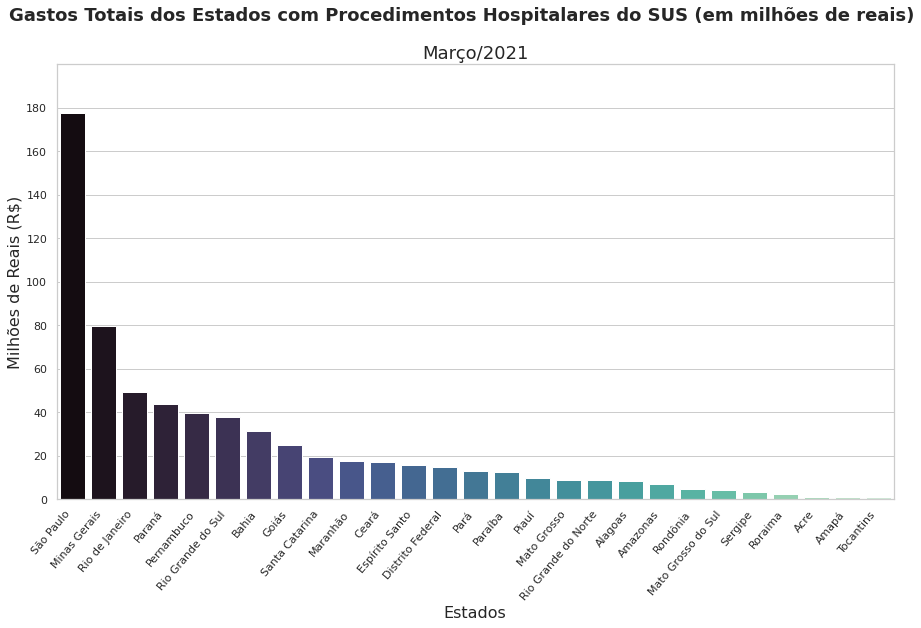

In [124]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Desenhando um gráfico de barras e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.barplot(x=dados_ordenados_total_recente.index, y = dados_ordenados_total_recente , palette= "mako")

# Ajustando o gráfico de 0 a 200 milhões
plt.ylim(0, 200)

# Adicionando título e subtítulo em nosso gráfico e ajustando nomeando os eixos
plt.suptitle("Gastos Totais dos Estados com Procedimentos Hospitalares do SUS (em milhões de reais)",
             size = 18, weight='bold')
plt.title("Março/2021", size = 18)
plt.ylabel("Milhões de Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Estados", fontdict={'fontsize': 16})

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
ax.set_xticklabels(dados_ordenados_total_recente.index, rotation=50, ha = "right")

#Ajustando o grid para 20 a 20 milhões
ax.set_yticks(range(0, 200, 20))

# Oculta as informações no topo do gráfico
plt.show()

Agora, seguindo a proposição desta aula, iniciaremos nossa análise comparando os gastos de cada estado em função do Estado da Bahia.

#### Gastos dos estados com o SUS em função da Bahia em Mar/2021:

In [125]:
# Colocando os gastos do mês atual em função da Bahia
dados_ordenados_total_recente_funcBA = dados_ordenados_total_recente / dados_ordenados_total_recente.loc["Bahia"]
dados_ordenados_total_recente_funcBA = dados_ordenados_total_recente_funcBA.drop("Bahia")


Fazendo um gráfico de comparação:

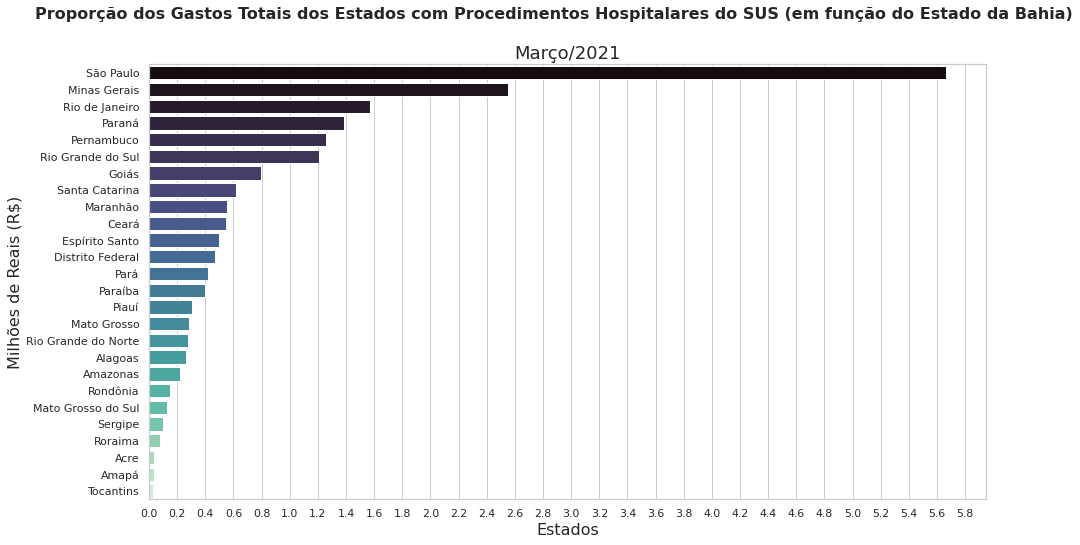

In [126]:
#Importando as bibliotecas necessárias
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Desenhando um gráfico de barras e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.barplot(x=dados_ordenados_total_recente_funcBA , y=dados_ordenados_total_recente_funcBA.index , palette= "mako",)

# Ajustando o gráfico de 0 a 200 milhões
#plt.ylim(0, 200)

# Adicionando título e subtítulo em nosso gráfico e ajustando nomeando os eixos
plt.suptitle("Proporção dos Gastos Totais dos Estados com Procedimentos Hospitalares do SUS (em função do Estado da Bahia)",
             size = 16, weight='bold')
plt.title("Março/2021", size = 18)
plt.ylabel("Milhões de Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Estados", fontdict={'fontsize': 16})

#Ajustando o grid para 0.5 a 0.5 
ax.set_xticks(np.arange(0, 6, 0.2))

# Oculta as informações no topo do gráfico
plt.show()

Considerando que 1.0 significa ter o gasto equivalente ao do Estado da Bahia, podemos notar que apenas 6 estados do Brasil gastaram mais em valores absolutos com o SUS. Sendo que metade desses 6 estados são da Região Sudeste (São Paulo, Minas Gerais e Rio de Janeiro) estados estes mais populosos do Brasil. Estados como Roraima, Amapá, Acre, Tocantins e Rondônia, que são os 5 menos populosos, tem menores gastos absolutos com o SUS. Isso nos faz refletir que o valor gasto com o SUS ou o repasse dessa verba tem muita influência com a quantidade de habitantes num dado estado.

Isso traz uma discussão de como analisar os dados levando em conta, também, o gasto per capita. Assim, podemos ter uma noção caso o repasse tem sido desigual, o que geraria um ponto de melhoria nas ações de promoção à saúde no país. 

#### Analisando os gastos per capita com o SUS de 2010 a 2020:


Para analisarmos os gastos per capita com o SUS de todos os estados, vamos inicialmente importar do site do IBGE as estimativas populacionais do período em que queremos tratar os dados.

In [127]:
url_populacao = 'https://raw.githubusercontent.com/afonsosr2/bootcamp_DS_Alura/main/dados/serie_2001_2020_TCU.csv'
dados_populacao = pd.read_csv(url_populacao, encoding="ISO-8859-1",skiprows = 4, 
                              sep=";", skipfooter = 17, thousands = ".")

# Tratando os dados para o DataFrame das populações e deixando apenas as 
# Unidades de Federação na primeira coluna. 
dados_populacao = dados_populacao.dropna()
dados_populacao.rename(columns = {'Unidades da Federação':'Unidade da Federação'}, inplace = True)
dados_populacao = dados_populacao.set_index("Unidade da Federação")
dados_populacao = dados_populacao.drop(index=['Brasil','Região Norte','Região Nordeste','Região Sudeste','Região Sul','Região Centro-Oeste'])

# Passando para uma escala de milhões de habitantes
dados_populacao = dados_populacao / 1000000

dados_populacao


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,,,,,,,,,,
Rondônia,1.41,1.43,1.46,1.56,1.53,1.56,1.45,1.49,1.50,1.56,1.58,1.59,1.73,1.75,1.77,1.79,1.81,1.76,1.78,1.80
Acre,0.57,0.59,0.60,0.63,0.67,0.69,0.66,0.68,0.69,0.73,0.75,0.76,0.78,0.79,0.80,0.82,0.83,0.87,0.88,0.89
Amazonas,2.90,2.96,3.03,3.14,3.23,3.31,3.22,3.34,3.39,3.48,3.54,3.59,3.81,3.87,3.94,4.00,4.06,4.08,4.14,4.21
Roraima,0.34,0.35,0.36,0.38,0.39,0.40,0.40,0.41,0.42,0.45,0.46,0.47,0.49,0.50,0.51,0.51,0.52,0.58,0.61,0.63
Pará,6.34,6.45,6.57,6.85,6.97,7.11,7.07,7.32,7.43,7.60,7.69,7.79,7.97,8.07,8.18,8.27,8.37,8.51,8.60,8.69
Amapá,0.50,0.52,0.53,0.55,0.59,0.62,0.59,0.61,0.63,0.67,0.68,0.70,0.73,0.75,0.77,0.78,0.80,0.83,0.85,0.86
Tocantins,1.18,1.21,1.23,1.26,1.31,1.33,1.24,1.28,1.29,1.38,1.40,1.42,1.48,1.50,1.52,1.53,1.55,1.56,1.57,1.59
Maranhão,5.73,5.80,5.87,6.02,6.10,6.18,6.12,6.31,6.37,6.57,6.65,6.71,6.79,6.85,6.90,6.95,7.00,7.04,7.08,7.11
Piauí,2.87,2.90,2.92,2.98,3.01,3.04,3.03,3.12,3.15,3.12,3.14,3.16,3.18,3.19,3.20,3.21,3.22,3.26,3.27,3.28


Com os dados da população já tratados podemos fazer um gráfico que compara todos os gastos per capita com o SUS em um dado ano ou período de tempo.

Primeiro, vamos plotar o gráfico do último mês de 2020 para todos os estados e analisar rapidamente o que podemos notar nesse gráifo. Depois, traçaremos um paralelo da evolução dos gastos per capita da Bahia em relação ao estado com o maior gasto per capita, no período de 2010 a 2020. 

In [128]:
# Definindo o período de 2010 a 2020 e dividindo os valores dos totais para 
# facilitar a leitura dos gastos em milhões de reais
colunas_definidas = dados_completos.columns[29:-3]
dados_2010_2020 = dados_completos[colunas_definidas]
dados_2010_2020 = dados_2010_2020 / 1000000
dados_2010_2020

,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,3.81,3.91,4.66,4.52,4.78,4.37,4.63,4.46,4.67,4.49,4.42,4.38,4.17,4.29,4.67,5.09,4.72,4.69,4.32,4.78,4.20,4.37,4.39,4.05,4.47,4.42,4.86,4.59,4.58,4.47,4.16,4.32,4.04,4.29,4.14,3.97,4.47,4.38,5.50,5.38,...,7.89,8.60,8.05,8.16,8.46,7.77,8.86,8.41,9.49,8.21,9.01,9.12,8.41,8.41,8.65,8.19,8.39,8.65,9.05,9.21,9.49,8.60,8.92,8.91,8.41,8.92,8.95,8.66,8.33,8.43,7.25,7.49,8.96,10.99,10.48,11.43,8.88,8.17,8.76,9.00
Acre,2.38,2.08,2.56,2.59,2.54,2.32,2.28,2.45,2.58,2.63,2.51,2.50,2.75,2.47,2.80,2.67,3.14,2.72,2.81,2.92,2.80,2.77,2.71,2.77,2.80,2.46,3.06,2.78,2.81,2.81,2.95,2.80,3.09,3.05,2.86,2.64,2.77,2.65,2.81,2.91,...,3.34,3.36,3.15,2.64,2.97,2.77,3.06,2.87,3.18,3.06,3.25,3.04,2.93,3.13,2.47,2.28,2.59,2.23,2.47,2.98,3.07,3.25,3.57,2.98,3.00,3.29,3.17,2.96,3.28,2.99,2.94,2.67,2.94,3.91,4.05,3.66,3.47,3.27,3.39,3.71
Amazonas,9.39,8.37,10.32,9.99,9.77,9.15,9.14,9.44,9.74,10.00,9.53,9.34,9.80,9.46,10.95,10.53,10.11,9.97,9.97,9.97,9.86,10.21,10.74,8.70,10.04,8.98,11.05,10.47,11.49,10.68,11.01,10.77,9.57,9.99,9.96,8.92,10.86,9.43,10.17,10.54,...,13.98,13.90,13.52,13.64,14.55,12.75,14.75,14.58,15.38,14.65,15.54,16.37,15.34,16.25,14.26,14.27,15.36,14.10,16.10,16.15,16.53,15.51,16.64,16.49,15.35,16.34,14.82,14.97,15.98,15.17,14.82,16.38,19.63,18.43,19.30,18.69,18.63,18.73,20.45,21.55
Roraima,1.62,1.45,1.82,1.72,1.93,1.85,1.88,2.05,1.94,1.76,1.53,1.49,1.60,1.22,1.28,1.38,1.68,1.77,1.65,1.66,1.80,1.86,1.66,1.62,1.61,1.63,1.77,1.59,1.98,1.78,1.74,1.82,1.64,1.37,1.61,1.59,1.71,1.48,1.78,1.71,...,2.74,2.69,2.67,2.69,2.74,2.48,2.67,2.72,2.84,2.97,2.84,3.33,2.88,2.96,2.52,2.46,2.66,2.50,2.85,2.79,2.84,2.65,2.87,3.18,3.07,3.16,3.12,2.89,3.08,2.97,2.81,2.31,2.92,3.30,3.19,3.26,2.98,3.31,3.53,3.13
Pará,26.42,25.48,28.54,26.95,28.44,26.95,26.13,27.76,27.28,26.52,26.69,26.32,28.00,26.17,29.19,27.29,27.76,26.46,25.65,27.35,27.12,27.15,27.08,25.94,26.93,25.39,28.70,26.85,28.54,24.99,23.92,25.34,26.46,27.08,25.65,24.23,27.49,24.86,28.39,29.94,...,32.98,33.67,33.48,32.07,33.62,30.62,34.12,35.04,35.42,34.16,34.48,35.62,34.38,38.44,33.58,32.79,34.51,31.89,33.24,31.01,31.06,28.54,36.71,36.46,36.79,36.98,35.58,35.25,37.05,34.68,34.91,29.18,43.33,40.99,40.50,38.79,36.97,38.41,37.04,36.91
Amapá,1.71,1.45,1.85,1.86,1.74,1.83,1.83,1.93,1.72,1.68,1.67,1.51,1.87,1.68,1.92,1.96,1.87,1.64,1.75,1.90,1.81,1.89,1.82,1.60,1.88,1.79,1.91,1.87,2.14,1.86,2.01,2.09,1.96,2.07,1.88,1.70,1.98,1.82,2.05,2.21,...,1.92,1.92,1.78,1.61,1.89,1.76,1.87,2.01,2.09,2.05,2.26,2.41,2.37,2.59,2.30,2.36,2.44,2.56,2.60,2.57,2.13,2.63,2.45,2.17,2.54,2.54,2.24,2.14,2.35,2.34,2.29,1.77,2.76,2.74,2.54,2.70,2.53,2.76,2.71,2.83
Tocantins,6.26,5.77,7.12,6.82,7.05,6.35,6.87,7.01,6.68,6.81,6.57,6.39,6.94,6.60,7.41,7.05,7.35,7.20,6.69,7.35,7.00,7.16,7.39,6.92,6.91,6.86,7.96,7.57,7.87,7.03,7.31,7.53,7.07,7.25,7.06,7.13,7.15,6.87,7.93,7.84,...,5.59,5.60,4.71,5.51,5.63,4.71,5.12,5.35,5.96,5.48,5.45,5.51,5.49,6.04,6.22,6.27,6.46,5.79,6.59,7.24,6.96,7.13,7.12,7.14,7.12,7.59,7.59,7.57,7.23,7.34,7.03,6.26,7.39,7.87,7.93,6.49,4.23,1.85,0.51,0.69
Maranhão,19.28,17.57,21.32,19.80,20.65,19.89,20.27,20.50,20.00,19.68,19.18,18.37,20.56,19.98,21.05,20.43,20.39,19.65,20.00,21.58,20.25,20.33,20.64,20.04,

In [129]:
# Definindo o período de 2010 a 2020 das estimativas da população 
colunas_definidas_pop = dados_populacao.columns[9:]
dados_2010_2020_pop = dados_populacao[colunas_definidas_pop]
dados_2010_2020_pop

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,
Rondônia,1.56,1.58,1.59,1.73,1.75,1.77,1.79,1.81,1.76,1.78,1.80
Acre,0.73,0.75,0.76,0.78,0.79,0.80,0.82,0.83,0.87,0.88,0.89
Amazonas,3.48,3.54,3.59,3.81,3.87,3.94,4.00,4.06,4.08,4.14,4.21
Roraima,0.45,0.46,0.47,0.49,0.50,0.51,0.51,0.52,0.58,0.61,0.63
Pará,7.60,7.69,7.79,7.97,8.07,8.18,8.27,8.37,8.51,8.60,8.69
Amapá,0.67,0.68,0.70,0.73,0.75,0.77,0.78,0.80,0.83,0.85,0.86
Tocantins,1.38,1.40,1.42,1.48,1.50,1.52,1.53,1.55,1.56,1.57,1.59
Maranhão,6.57,6.65,6.71,6.79,6.85,6.90,6.95,7.00,7.04,7.08,7.11
Piauí,3.12,3.14,3.16,3.18,3.19,3.20,3.21,3.22,3.26,3.27,3.28


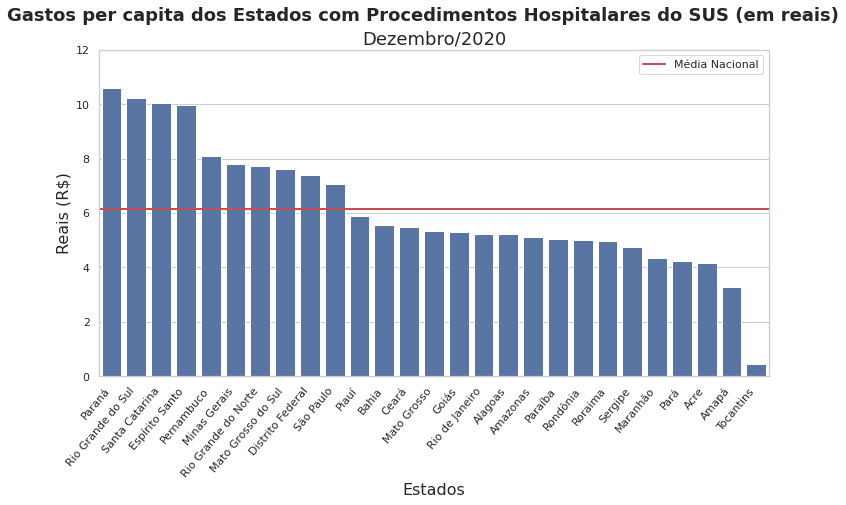

In [130]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid") 
plt.figure(figsize=(12, 6))

# Gasto per capita em dezembro de 2020
gasto_per_capita_dez_2020 = (dados_2010_2020["2020/Dez"] / dados_2010_2020_pop["2020"]).sort_values(ascending=False)

# Desenhando um gráfico de barras e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.barplot(x=gasto_per_capita_dez_2020.index, y = gasto_per_capita_dez_2020, color='b')
ax.axhline(y=gasto_per_capita_dez_2020.mean(), linewidth=2, color='r', label="Média Nacional")

# Ajustando o gráfico de 0 a 10 reais per capita
plt.ylim(0, 12)

# Adicionando título e subtítulo em nosso gráfico e ajustando nomeando os eixos
plt.suptitle("Gastos per capita dos Estados com Procedimentos Hospitalares do SUS (em reais)",
             size = 18, weight='bold')
plt.title("Dezembro/2020", size = 18)
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Estados", fontdict={'fontsize': 16})
plt.legend()

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
ax.set_xticklabels(gasto_per_capita_dez_2020.index, rotation=50, ha = "right")

# Oculta as informações no topo do gráfico
plt.show()


É possível notar no gráfico que os estados da Região Sul possuem o maior gasto per capita que poderia ser por dois motivos: ou os gastos com o SUS estão mais altos nessa região por necessidade de atendimentos, ou o repasse é melhor distribuído nessa região.

Aqui vemos que São Paulo menos com valores dos gastos bem acima que muitos estado, ficou apenas em 10° no gastos per capita no período definido.

Infelizmente, podemos notar que mesmo sendo uma região com baixa densidade populacional, ainda assim o gasto com o SUS é bem abaixo da média nacional na Região Norte.

Para nossa análise entre 2 estados escolherei o que aparece com maior gasto per capita (Paraná) e o estado da Bahia. E, nesse análise colocarei um período entre 2010 a 2020. Lembrando que antes de mais nada é necessário definir as médias anuais para depois traçar o paralelo de cada ano.

Vamos nessa?

In [131]:
# Fazendo duas queries: uma para separar apenas os gastos dos estados da Bahia e Paraná
# e outra para separar apenas as populações deles.
dados_2010_2020_PR_BA = dados_2010_2020.query('index == ["Bahia", "Paraná"]')
dados_2010_2020_PR_BA

dados_populacao_PR_BA = dados_2010_2020_pop.query('index == ["Bahia", "Paraná"]')
dados_populacao_PR_BA

,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bahia,48.61,44.51,54.61,51.54,55.44,47.48,51.15,53.63,51.01,51.50,51.21,49.58,53.68,50.68,54.92,54.32,56.09,52.21,55.14,63.05,55.10,56.92,53.59,52.88,56.24,51.30,60.63,56.05,60.52,56.24,59.43,59.22,54.81,56.00,54.78,54.12,55.59,49.63,57.99,60.19,...,68.15,71.76,68.35,64.80,70.36,60.86,68.98,70.90,73.08,68.40,74.88,74.70,70.62,76.59,71.55,67.59,70.12,66.84,69.98,73.30,79.43,70.57,79.61,77.88,75.45,79.09,72.32,68.68,74.41,67.81,71.00,60.14,66.38,78.68,91.01,86.23,78.14,82.91,81.87,83.13
Paraná,66.90,64.50,77.14,70.76,73.46,71.84,73.01,76.15,74.24,73.04,76.36,70.52,74.71,71.31,76.91,74.23,81.71,74.99,77.03,80.71,75.63,77.69,75.10,69.17,74.22,72.97,80.91,78.14,85.40,77.80,83.52,83.84,79.19,84.99,78.73,71.09,81.23,73.98,83.93,91.66,...,110.72,117.57,112.46,105.56,116.13,107.08,122.33,124.73,127.08,122.62,127.99,131.26,120.65,129.53,121.81,112.98,124.16,117.72,123.91,127.46,132.61,124.87,134.71,127.17,126.20,133.87,126.22,113.57,122.33,116.13,114.78,97.78,111.01,115.20,123.86,125.09,121.77,127.51,133.44,122.15


In [132]:
# Separando os valores dos custos mensais de BA e PR e calculando as médias
# por ano entre 2010 e 2020.
dados_2010_2020_media_anual_PR = []
dados_2010_2020_media_anual_BA = []
incrementa_ano = 0

for ano in range(0,11):
  soma_BA = 0
  soma_PR = 0

  for mes in range(0, 12):
    soma_BA += dados_2010_2020_PR_BA.T.iloc[mes+incrementa_ano][0]
    soma_PR += dados_2010_2020_PR_BA.T.iloc[mes+incrementa_ano][1]

  dados_2010_2020_media_anual_BA.append(soma_BA / 12)
  dados_2010_2020_media_anual_PR.append(soma_PR / 12)
  incrementa_ano += 12

In [133]:
 # Montando um novo DataFrame com as médias anuais dos gastos com SUS da Bahia
 # e Paraná 
dados_BA = dados_2010_2020_media_anual_BA
dados_PR = dados_2010_2020_media_anual_PR
anos = [ano for ano in range(2010, 2021)]
dados_2010_2020_media_anual_PR_BA = pd.DataFrame(list(zip(dados_BA, dados_PR)),
                                                 index=anos, columns =['Bahia','Paraná'])
dados_2010_2020_media_anual_PR_BA = dados_2010_2020_media_anual_PR_BA.T
dados_2010_2020_media_anual_PR_BA

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Bahia,50.86,54.88,56.61,59.28,63.02,64.64,67.73,69.10,70.71,73.61,76.81
Paraná,72.33,75.77,79.23,85.92,88.65,93.15,102.52,112.06,122.02,126.04,119.25


In [165]:
 # Montando o DataFrame dos gastos anuais com SUS per capita da Bahia e do Paraná 
gasto_per_capita_PR_BA = dados_2010_2020_media_anual_PR_BA.values / dados_populacao_PR_BA.values
gasto_per_capita_PR_BA = pd.DataFrame(gasto_per_capita_PR_BA,index=['Bahia','Paraná'], columns = anos)
gasto_per_capita_PR_BA

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Bahia,3.63,3.89,3.99,3.94,4.17,4.25,4.43,4.50,4.77,4.95,5.14
Paraná,6.93,7.21,7.49,7.81,8.00,8.34,9.12,9.90,10.75,11.02,10.35


Agora, finalmente, vamos plotar o gráfico dos gastos anuais com SUS per capita da Bahia e do Paraná entre os anos de 2010 e 2020:

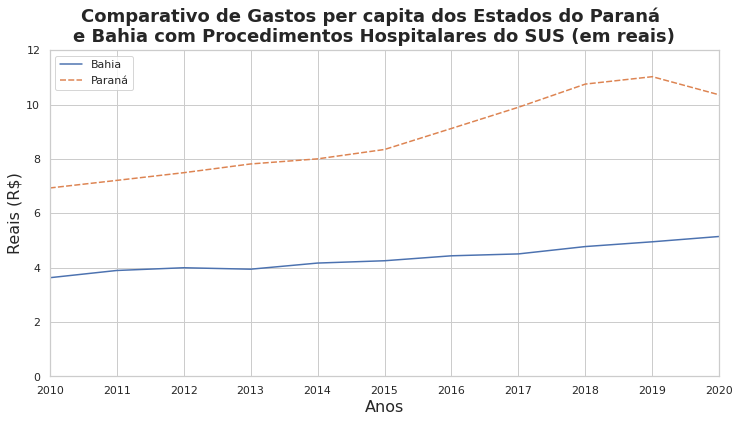

In [185]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid") 
plt.figure(figsize=(12, 6))

# Desenhando um gráfico de barras e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=gasto_per_capita_PR_BA.T)



# Adicionando título e subtítulo em nosso gráfico e ajustando nomeando os eixos
plt.suptitle("Comparativo de Gastos per capita dos Estados do Paraná \ne Bahia com Procedimentos Hospitalares do SUS (em reais)",
             size = 18, weight='bold')


# Ajustando título do eixo e os seus valores 0 a 12 reais per capita
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.ylim(0, 12)

# Ajustando título do eixo e os limites de 2010 a 2020
plt.xlabel("Anos", fontdict={'fontsize': 16})
plt.xlim(2010, 2020)
ax.set_xticks(range(2010, 2021))


# Oculta as informações no topo do gráfico
plt.show()


Pelo gráfico, é possível notar que o aumento do gasto per capita da Bahia evolui muito timidamente se comparado com o Paraná, salvo o caso da queda presente no Estado do Paraná durante o ano de 2020 que pode ter alguma influência com a pandemia do novo Coronavírus.

Embora, seria necessária uma nova análise para compreender um pouco mais essa queda.